In [1]:
from dataset import load_dataset
from clean import fill_nans, remove_outliers
from tree import tree, test

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
sns.set()

# Dataset

In [2]:
df = load_dataset()
df = remove_outliers(df, iqr_ratio=5)
df = fill_nans(df, pd.DataFrame.median)
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,3.90945,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0


# Decision Tree

,accuracy,f1,precision,recall
0,0.945628,0.717964,0.711228,0.726938


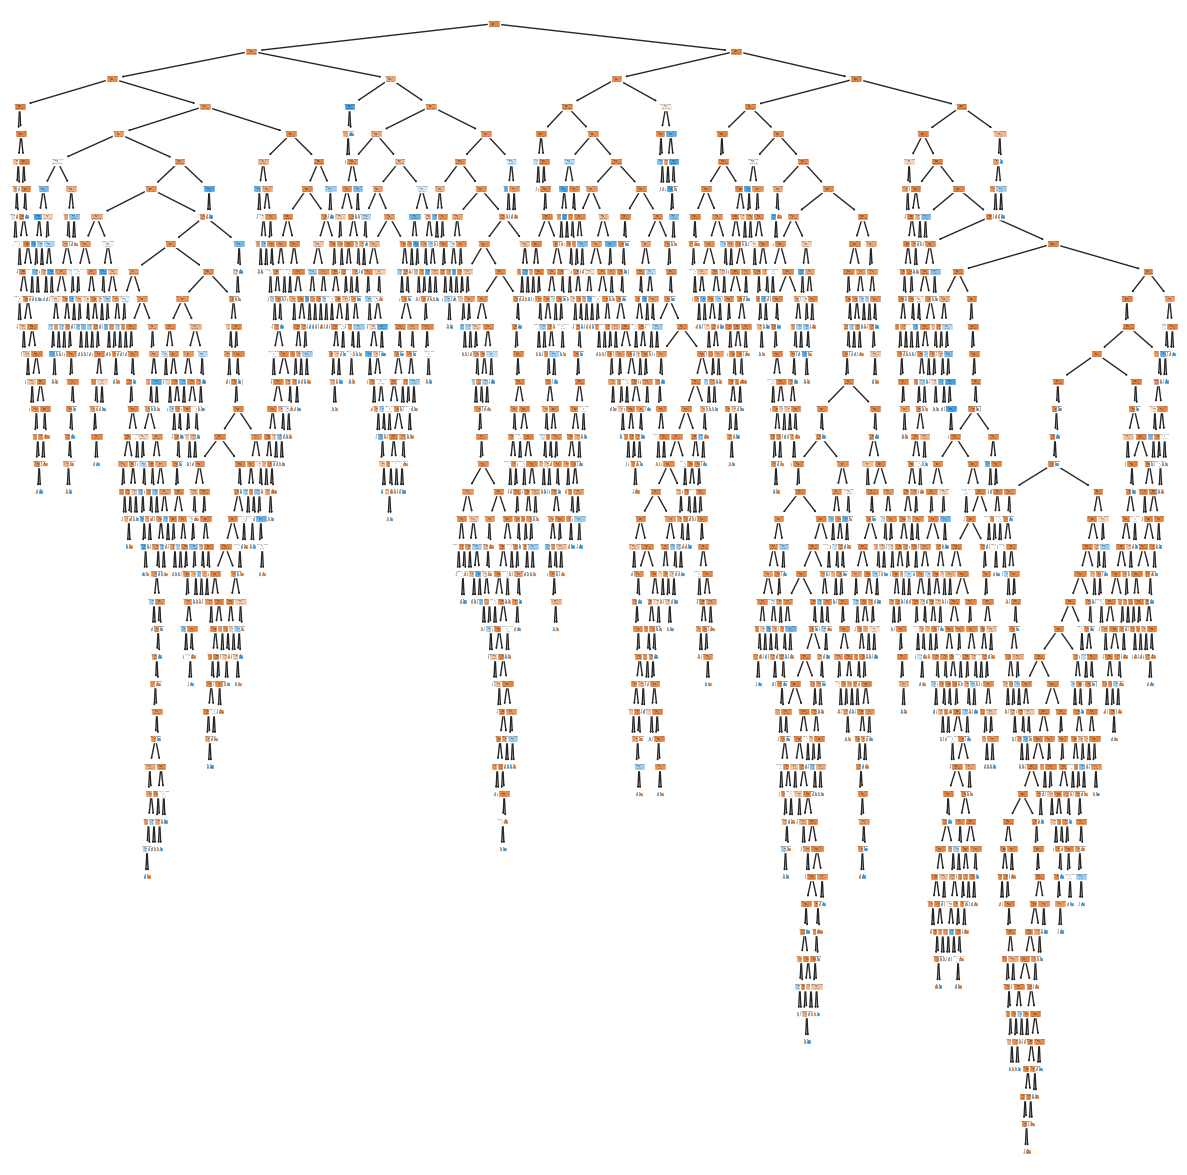

In [3]:
res, classifier = tree(df)
display(res)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
plot_tree(classifier, ax=ax, label='none', filled=True)
plt.show()

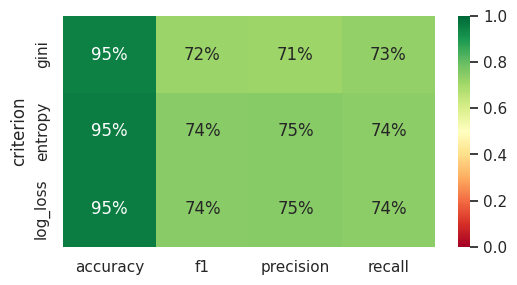

In [3]:
test(df, 'criterion', ['gini', 'entropy', 'log_loss'], dict())

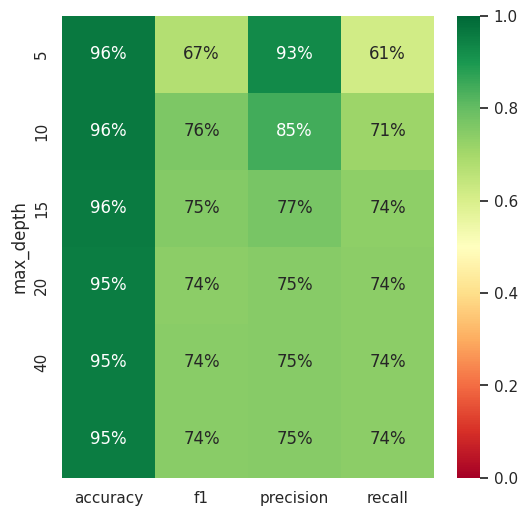

In [ ]:
test(df, 'max_depth', [5, 10, 15, 20, 40, None], dict(criterion='entropy'))

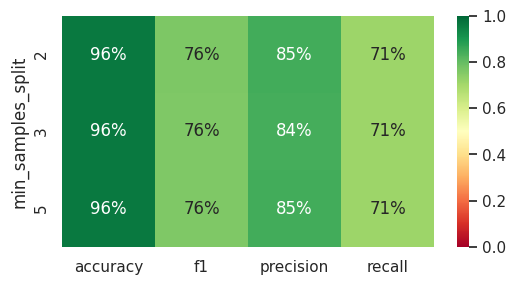

In [6]:
test(df, 'min_samples_split', [2, 3, 5], dict(criterion='entropy', max_depth=10))

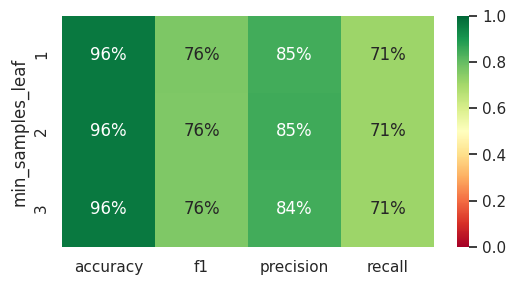

In [7]:
test(df, 'min_samples_leaf', [1, 2, 3], dict(criterion='entropy', max_depth=10))

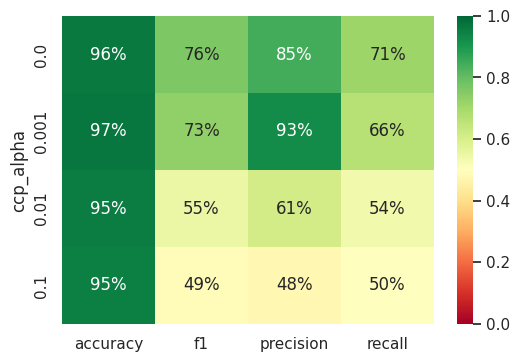

In [8]:
test(df, 'ccp_alpha', [0, 0.001, 0.01, 0.1], dict(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1))

In [10]:
from tqdm.notebook import tqdm
import itertools

combined = pd.DataFrame()
for criterion, max_depth, min_samples_split, min_samples_leaf, ccp_alpha in tqdm(itertools.product(
    ['gini', 'entropy', 'log_loss'],
    [5, 10, 15, 20, 40, None],
    [2, 3, 5],
    [1, 2, 3],
    [0, 0.001, 0.01, 0.1]
), total=3*6*3*3*4):
    res, _ = tree(df, dict(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, ccp_alpha=ccp_alpha))
    res['criterion'] = criterion
    res['max_depth'] = max_depth
    res['min_samples_split'] = min_samples_split
    res['min_samples_leaf'] = min_samples_leaf
    res['ccp_alpha'] = ccp_alpha
    combined = pd.concat([combined, res])
combined.sort_values(by=['f1', 'accuracy'], ascending=False)

  0%|          | 0/648 [00:00<?, ?it/s]

,accuracy,f1,precision,recall,criterion,max_depth,min_samples_split,min_samples_leaf,ccp_alpha
0,0.964520,0.762126,0.846841,0.714172,entropy,10,2,1,0.0
0,0.964520,0.762126,0.846841,0.714172,log_loss,10,2,1,0.0
0,0.964336,0.761711,0.844855,0.714300,entropy,10,2,3,0.0
0,0.964336,0.761711,0.844855,0.714300,entropy,10,3,3,0.0
0,0.964336,0.761711,0.844855,0.714300,entropy,10,5,3,0.0
...,...,...,...,...,...,...,...,...,...
0,0.951826,0.487659,0.475913,0.500000,log_loss,None,3,2,0.1
0,0.951826,0.487659,0.475913,0.500000,log_loss,None,3,3,0.1
0,0.951826,0.487659,0.475913,0.500000,log_loss,None,5,1,0.1
0,0.951826,0.487659,0.475913,0.500000,log_loss,None,5,2,0.1


,accuracy,f1,precision,recall
0,0.96452,0.762126,0.846841,0.714172


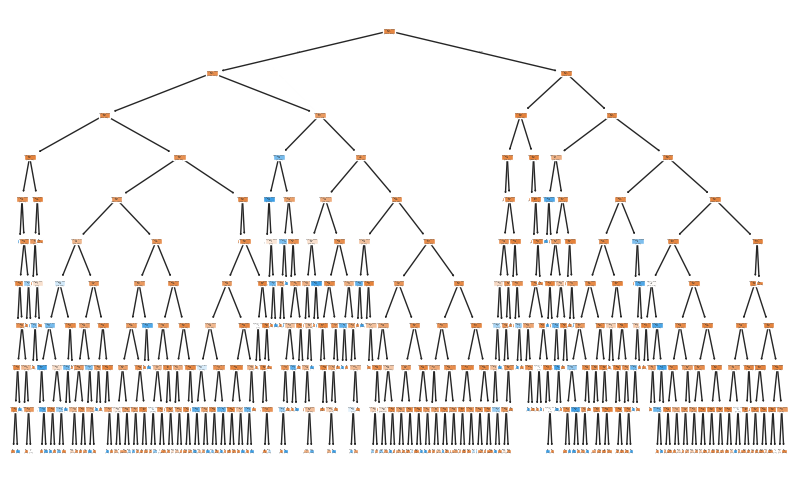

In [6]:
res, classifier = tree(df, dict(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0))
display(res)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_tree(classifier, ax=ax, label='none', filled=True)
plt.show()